In [112]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pprint import pprint


In [113]:
#debugging line to fins instances that need to be float and are strings instead.  
#with open('CDC.csv') as f:
    #lines = iter(f)
    #for i in range(10):
        #print(next(lines))

In [114]:
#importing the vcs from CDC that includes the reported measles cases from 2013 to 2017
cdc_df = pd.read_csv("CDC.csv")
cdc_df.head()

,Disease,MMWR year,MMWR week,Current week,"Current week, flag",Cum 2018,"Cum 2018, flag",5-year weekly average,"5-year weekly average§, flag",Total cases reported for pervious years 2017,"Total cases reported for pervious years 2017, flag",Total cases reported for pervious years 2016,"Total cases reported for pervious years 2016, flag",Total cases reported for pervious years 2015,"Total cases reported for pervious years 2015, flag",Total cases reported for pervious years 2014,"Total cases reported for pervious years 2014, flag",Total cases reported for pervious years 2013,"Total cases reported for pervious years 2013, flag",States reporting cases during current week (No.)
0,Anthrax,2018.0,1.0,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN,-,NaN
1,"Arboviral diseases, neuroinvasive and nonneur...",2018.0,1.0,NaN,-,NaN,-,6.0,NaN,115,NaN,247.0,NaN,896.0,NaN,NaN,NN,NaN,NN,NaN
2,"Arboviral diseases, neuroinvasive and nonneur...",2018.0,1.0,NaN,-,NaN,-,0.0,NaN,3,NaN,7.0,NaN,6.0,NaN,8.0,NaN,8.0,NaN,NaN
3,"Arboviral diseases, neuroinvasive and nonneur...",2018.0,1.0,NaN,-,NaN,-,0.0,NaN,67,NaN,15.0,NaN,11.0,NaN,11.0,NaN,22.0,NaN,NaN
4,"Arboviral diseases, neuroinvasive and nonneur...",2018.0,1.0,NaN,-,NaN,-,NaN,-,44,NaN,35.0,NaN,55.0,NaN,80.0,NaN,85.0,NaN,NaN


In [115]:
cdc_short = cdc_df.drop(['Current week','Current week, flag', 
                         'Cum 2018','Cum 2018, flag', 
                         'MMWR year',
                         'MMWR week',
            'Total cases reported for pervious years 2017, flag',
             'Total cases reported for pervious years 2016, flag',
             'Total cases reported for pervious years 2015, flag',
            'Total cases reported for pervious years 2014, flag',
            'Total cases reported for pervious years 2013, flag'], axis=1)
cdc_short.head()

,Disease,5-year weekly average,"5-year weekly average§, flag",Total cases reported for pervious years 2017,Total cases reported for pervious years 2016,Total cases reported for pervious years 2015,Total cases reported for pervious years 2014,Total cases reported for pervious years 2013,States reporting cases during current week (No.)
0,Anthrax,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN
1,"Arboviral diseases, neuroinvasive and nonneur...",6.0,NaN,115,247.0,896.0,NaN,NaN,NaN
2,"Arboviral diseases, neuroinvasive and nonneur...",0.0,NaN,3,7.0,6.0,8.0,8.0,NaN
3,"Arboviral diseases, neuroinvasive and nonneur...",0.0,NaN,67,15.0,11.0,11.0,22.0,NaN
4,"Arboviral diseases, neuroinvasive and nonneur...",NaN,-,44,35.0,55.0,80.0,85.0,NaN


In [116]:
# more debugging to isolate numbers that are strings
#cdc_short.iloc[1].values

In [117]:
#dropping boolean columns that are not needed
cdc_shorter = cdc_short.drop(cdc_short.columns[[1,2,8]], axis=1)
cdc_shorter.head()

,Disease,Total cases reported for pervious years 2017,Total cases reported for pervious years 2016,Total cases reported for pervious years 2015,Total cases reported for pervious years 2014,Total cases reported for pervious years 2013
0,Anthrax,NaN,NaN,NaN,NaN,NaN
1,"Arboviral diseases, neuroinvasive and nonneur...",115,247.0,896.0,NaN,NaN
2,"Arboviral diseases, neuroinvasive and nonneur...",3,7.0,6.0,8.0,8.0
3,"Arboviral diseases, neuroinvasive and nonneur...",67,15.0,11.0,11.0,22.0
4,"Arboviral diseases, neuroinvasive and nonneur...",44,35.0,55.0,80.0,85.0


In [118]:
#renaming the columns to jsut show the elements that we need to display on the chart
cdc_shorter = cdc_shorter.rename(index=str, columns={"Total cases reported for pervious years  2017": "2017", 
                                           "Total cases reported for pervious years 2016": "2016",
                                           "Total cases reported for pervious years 2015": "2015",
                                           "Total cases reported for pervious years 2014": "2014",
                                           "Total cases reported for pervious years 2013": "2013"
                                          }
)

In [119]:
cdc_shorter.head()

,Disease,2017,2016,2015,2014,2013
0,Anthrax,NaN,NaN,NaN,NaN,NaN
1,"Arboviral diseases, neuroinvasive and nonneur...",115,247.0,896.0,NaN,NaN
2,"Arboviral diseases, neuroinvasive and nonneur...",3,7.0,6.0,8.0,8.0
3,"Arboviral diseases, neuroinvasive and nonneur...",67,15.0,11.0,11.0,22.0
4,"Arboviral diseases, neuroinvasive and nonneur...",44,35.0,55.0,80.0,85.0


In [120]:
#reversing the order of the columns to be consistent with plotting time based charts
column_order = cdc_shorter.columns.tolist()
column_order = column_order[::-1]
cdc_shorter = cdc_shorter[column_order]

In [121]:
cdc_shorter.head()

,2013,2014,2015,2016,2017,Disease
0,NaN,NaN,NaN,NaN,NaN,Anthrax
1,NaN,NaN,896.0,247.0,115,"Arboviral diseases, neuroinvasive and nonneur..."
2,8.0,8.0,6.0,7.0,3,"Arboviral diseases, neuroinvasive and nonneur..."
3,22.0,11.0,11.0,15.0,67,"Arboviral diseases, neuroinvasive and nonneur..."
4,85.0,80.0,55.0,35.0,44,"Arboviral diseases, neuroinvasive and nonneur..."


In [122]:
#removing commas from numbers in columns and ....
cdc_shorter['2017'] = cdc_shorter['2017'].str.replace(',', '')

In [123]:
#...converting them to floats so we can perform calculations
cdc_shorter['2017'] = cdc_shorter['2017'].astype(float)

In [124]:
# removing all other deseases EXCEPT for measles
cdc_shorter_two = cdc_shorter.drop(cdc_shorter.index[0:29])

In [125]:
# verifying
cdc_shorter_two.head()

,2013,2014,2015,2016,2017,Disease
29,187.0,667.0,188.0,85.0,122.0,Measles
30,142.0,123.0,120.0,126.0,66.0,"Meningococcal disease, Serogroups ACWY"
31,99.0,89.0,111.0,86.0,67.0,"Meningococcal disease, Serogroup B"
32,17.0,25.0,21.0,21.0,14.0,"Meningococcal disease, Other serogroups"
33,298.0,196.0,120.0,142.0,187.0,"Meningococcal disease, Unknown serogroup"


In [126]:
#removing other diseases
cdc_shorter_three = cdc_shorter_two.drop(cdc_shorter.index[30:3393])

In [127]:
cdc_shorter_three

,2013,2014,2015,2016,2017,Disease
29,187.0,667.0,188.0,85.0,122.0,Measles


In [128]:
# verifying no strings in the data set. 
cdc_shorter_three.values

array([[187.0, 667.0, 188.0, 85.0, 122.0, 'Measles']], dtype=object)

In [129]:
#resetingthe index
cdc_shorter_three = cdc_shorter_three.reset_index(drop=True)
cdc_shorter_three

,2013,2014,2015,2016,2017,Disease
0,187.0,667.0,188.0,85.0,122.0,Measles


In [130]:
#importing the another csv from CDC that includes the reported measles cases for 2018 and 2019 by state and origin
NNDSS_df = pd.read_csv("NNDSS_-_TABLE_1V._Malaria_to_Measles__Imported-10.csv")
NNDSS_df.head()

,Reporting Area,MMWR Year,MMWR Week,"Malaria, Current week","Malaria, Current week, flag","Malaria, Previous 52 weeks Max","Malaria, Previous 52 weeks Max, flag","Malaria, Cum 2019","Malaria, Cum 2019, flag","Malaria, Cum 2018",...,Measles Imported Current week flag,Measles Imported Previous 52 weeks Max,Measles Imported Previous 52 weeks Max flag,Measles Imported Cum 2019,Measles Imported Cum 2019 flag,Measles Imported Cum 2018,Measles Imported Cum 2018 flag,Location 1,Location 2,Reporting Area Sort
0,ALASKA,2019,1,NaN,-,1.0,NaN,NaN,-,NaN,...,-,0.0,NaN,NaN,-,NaN,-,"ALASKA\n(63.631126, -151.631889)",NaN,20190158
1,PENNSYLVANIA,2019,1,NaN,-,8.0,NaN,NaN,-,NaN,...,-,1.0,NaN,NaN,-,NaN,-,"PENNSYLVANIA\n(40.896694, -77.838886)",NaN,20190113
2,WEST SOUTH CENTRAL,2019,1,NaN,-,5.0,NaN,NaN,-,NaN,...,-,1.0,NaN,NaN,-,NaN,-,NaN,WEST SOUTH CENTRAL,20190143
3,INDIANA,2019,1,NaN,-,1.0,NaN,NaN,-,1.0,...,-,1.0,NaN,NaN,-,1.0,NaN,"INDIANA\n(39.919991, -86.2818)",NaN,20190116
4,AMERICAN SAMOA,2019,1,NaN,-,0.0,NaN,NaN,-,NaN,...,-,0.0,NaN,NaN,-,NaN,-,NaN,AMERICAN SAMOA,20190164


In [131]:
#removing columns that are not needed
NNDSS_df2 = NNDSS_df.drop(NNDSS_df.columns[[1,3,4,5,6,7,8,9,10,12,14,16,18,20,22,24,26,27,28,29]], axis=1)
NNDSS_df2

,Reporting Area,MMWR Week,Measles Indigenous Current week,Measles Indigenous Previous 52 weeks Max,Measles Indigenous Cum 2019,Measles Indigenous Cum 2018,Measles Imported Current week,Measles Imported Previous 52 weeks Max,Measles Imported Cum 2019,Measles Imported Cum 2018
0,ALASKA,1,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
1,PENNSYLVANIA,1,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN
2,WEST SOUTH CENTRAL,1,NaN,5.0,NaN,NaN,NaN,1.0,NaN,NaN
3,INDIANA,1,NaN,0.0,NaN,NaN,NaN,1.0,NaN,1.0
4,AMERICAN SAMOA,1,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
5,TOTAL,1,NaN,9.0,NaN,NaN,NaN,16.0,NaN,1.0
6,VERMONT,1,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN
7,SOUTH DAKOTA,1,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
8,WEST NORTH CENTRAL,1,NaN,5.0,NaN,NaN,NaN,6.0,NaN,NaN
9,OKLAHOMA,1,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN


In [132]:
#focusing only on the most recent week: week 26
NNDSS_HALF = NNDSS_df2.loc[NNDSS_df2["MMWR Week"] == 26]
NNDSS_HALF.head()

,Reporting Area,MMWR Week,Measles Indigenous Current week,Measles Indigenous Previous 52 weeks Max,Measles Indigenous Cum 2019,Measles Indigenous Cum 2018,Measles Imported Current week,Measles Imported Previous 52 weeks Max,Measles Imported Cum 2019,Measles Imported Cum 2018
1750,US RESIDENTS,26,NaN,60.0,668.0,38.0,17.0,68.0,375.0,60.0
1751,NEW ENGLAND,26,NaN,2.0,3.0,NaN,NaN,2.0,7.0,3.0
1752,CONNECTICUT,26,NaN,2.0,2.0,NaN,NaN,1.0,1.0,3.0
1753,MAINE,26,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN
1754,MASSACHUSETTS,26,NaN,0.0,NaN,NaN,NaN,2.0,3.0,NaN


In [133]:
#checking stats
NNDSS_HALF.count()

Reporting Area                               70
MMWR Week                                    70
Measles Indigenous Current week               0
Measles Indigenous Previous 52 weeks Max     69
Measles Indigenous Cum 2019                  29
Measles Indigenous Cum 2018                  14
Measles Imported Current week                 5
Measles Imported Previous 52 weeks Max       69
Measles Imported Cum 2019                    36
Measles Imported Cum 2018                    33
dtype: int64

In [134]:
#dropping more records that are not necessary for plotting
NNDSS_HALF_CLEAN = NNDSS_HALF.drop([1750,1758,1777,1793,1807,1819], axis=0)
NNDSS_HALF_CLEAN.count()

Reporting Area                               64
MMWR Week                                    64
Measles Indigenous Current week               0
Measles Indigenous Previous 52 weeks Max     63
Measles Indigenous Cum 2019                  23
Measles Indigenous Cum 2018                   8
Measles Imported Current week                 2
Measles Imported Previous 52 weeks Max       63
Measles Imported Cum 2019                    30
Measles Imported Cum 2018                    27
dtype: int64

In [135]:
#checking stats
NNDSS_HALF_CLEAN.sum()

Reporting Area                               NEW ENGLANDCONNECTICUTMAINEMASSACHUSETTSNEW HA...
MMWR Week                                                                                 1664
Measles Indigenous Current week                                                              0
Measles Indigenous Previous 52 weeks Max                                                   145
Measles Indigenous Cum 2019                                                                681
Measles Indigenous Cum 2018                                                                 59
Measles Imported Current week                                                               17
Measles Imported Previous 52 weeks Max                                                     150
Measles Imported Cum 2019                                                                  438
Measles Imported Cum 2018                                                                   85
dtype: object

In [136]:
NNDSS_HALF_CLEAN.head()

,Reporting Area,MMWR Week,Measles Indigenous Current week,Measles Indigenous Previous 52 weeks Max,Measles Indigenous Cum 2019,Measles Indigenous Cum 2018,Measles Imported Current week,Measles Imported Previous 52 weeks Max,Measles Imported Cum 2019,Measles Imported Cum 2018
1751,NEW ENGLAND,26,NaN,2.0,3.0,NaN,NaN,2.0,7.0,3.0
1752,CONNECTICUT,26,NaN,2.0,2.0,NaN,NaN,1.0,1.0,3.0
1753,MAINE,26,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN
1754,MASSACHUSETTS,26,NaN,0.0,NaN,NaN,NaN,2.0,3.0,NaN
1755,NEW HAMPSHIRE,26,NaN,0.0,NaN,NaN,NaN,1.0,2.0,NaN


In [137]:
#checking the syntax of column headers (keys) for extra spaces
NNDSS_HALF_CLEAN.columns

Index(['Reporting Area', 'MMWR Week', 'Measles Indigenous Current week',
       'Measles Indigenous Previous 52 weeks Max ',
       'Measles Indigenous Cum 2019 ', 'Measles Indigenous Cum 2018 ',
       'Measles Imported Current week',
       'Measles Imported Previous 52 weeks Max ', 'Measles Imported Cum 2019 ',
       'Measles Imported Cum 2018 '],
      dtype='object')

In [138]:
#renaming column headers with shorter names
NNDSS_HALF_CLEAN = NNDSS_HALF_CLEAN.rename(index=str, columns=
                                             {"Measles Indigenous Current week" : "MNDC",
                                              "Measles Indigenous Previous 52 weeks Max " : "MNDMAX",
                                              "Measles Indigenous Cum 2019 " : "MND2019",
                                              "Measles Indigenous Cum 2018 " : "MND2018",
                                              "Measles Imported Current week" : "MMPC",
                                              "Measles Imported Previous 52 weeks Max " : "MMPMAX",
                                              "Measles Imported Cum 2019 " : "MMP2019",
                                              "Measles Imported Cum 2018 " : "MMP2018"
}
)

In [139]:
NNDSS_HALF_CLEAN.head()

,Reporting Area,MMWR Week,MNDC,MNDMAX,MND2019,MND2018,MMPC,MMPMAX,MMP2019,MMP2018
1751,NEW ENGLAND,26,NaN,2.0,3.0,NaN,NaN,2.0,7.0,3.0
1752,CONNECTICUT,26,NaN,2.0,2.0,NaN,NaN,1.0,1.0,3.0
1753,MAINE,26,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN
1754,MASSACHUSETTS,26,NaN,0.0,NaN,NaN,NaN,2.0,3.0,NaN
1755,NEW HAMPSHIRE,26,NaN,0.0,NaN,NaN,NaN,1.0,2.0,NaN


In [140]:
#converting NaN to numeric 0 so we can add values of columns.
NNDSS_HALF_FORMAT = NNDSS_HALF_CLEAN.fillna(0)
NNDSS_HALF_FORMAT.head()

,Reporting Area,MMWR Week,MNDC,MNDMAX,MND2019,MND2018,MMPC,MMPMAX,MMP2019,MMP2018
1751,NEW ENGLAND,26,0.0,2.0,3.0,0.0,0.0,2.0,7.0,3.0
1752,CONNECTICUT,26,0.0,2.0,2.0,0.0,0.0,1.0,1.0,3.0
1753,MAINE,26,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1754,MASSACHUSETTS,26,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0
1755,NEW HAMPSHIRE,26,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0


In [141]:
#T_DF = NNDSS_HALF_FORMAT.transpose()
#T_DF

In [142]:
#zz = NNDSS_HALF_FORMAT[['Reporting Area','MMP2019']]
#zz.plot(kind='bar')

In [143]:
#adding up initial reported indigenous measles cases and imported measles cases for 2018, plus adjusted numbers for 2018
NNDSS_HALF_CLEAN['2018'] = NNDSS_HALF_FORMAT['MND2018'] + NNDSS_HALF_FORMAT['MMP2018'] + (NNDSS_HALF_FORMAT['MNDMAX'] + NNDSS_HALF_FORMAT['MMPMAX'])*0.76

In [144]:
#adding up initial reported indigenous measles cases and imported measles cases for 2019, and subtracting duplicate cases
NNDSS_HALF_CLEAN['2019'] = NNDSS_HALF_FORMAT['MND2019'] + NNDSS_HALF_FORMAT['MMP2019'] - NNDSS_HALF_FORMAT['MMPC']

In [145]:
NNDSS_HALF_CLEAN.head()

,Reporting Area,MMWR Week,MNDC,MNDMAX,MND2019,MND2018,MMPC,MMPMAX,MMP2019,MMP2018,2018,2019
1751,NEW ENGLAND,26,NaN,2.0,3.0,NaN,NaN,2.0,7.0,3.0,6.04,10.0
1752,CONNECTICUT,26,NaN,2.0,2.0,NaN,NaN,1.0,1.0,3.0,5.28,3.0
1753,MAINE,26,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.52,2.0
1754,MASSACHUSETTS,26,NaN,0.0,NaN,NaN,NaN,2.0,3.0,NaN,1.52,3.0
1755,NEW HAMPSHIRE,26,NaN,0.0,NaN,NaN,NaN,1.0,2.0,NaN,0.76,2.0


In [146]:
#checking the calculations
recent_years = NNDSS_HALF_CLEAN.sum()
recent_years

Reporting Area    NEW ENGLANDCONNECTICUTMAINEMASSACHUSETTSNEW HA...
MMWR Week                                                      1664
MNDC                                                              0
MNDMAX                                                          145
MND2019                                                         681
MND2018                                                          59
MMPC                                                             17
MMPMAX                                                          150
MMP2019                                                         438
MMP2018                                                          85
2018                                                          368.2
2019                                                           1102
dtype: object

In [147]:
recent_df = pd.DataFrame(recent_years)
recent_df

,0
Reporting Area,NEW ENGLANDCONNECTICUTMAINEMASSACHUSETTSNEW HA...
MMWR Week,1664
MNDC,0
MNDMAX,145
MND2019,681
MND2018,59
MMPC,17
MMPMAX,150
MMP2019,438
MMP2018,85


In [148]:
recent_df.transpose()

,Reporting Area,MMWR Week,MNDC,MNDMAX,MND2019,MND2018,MMPC,MMPMAX,MMP2019,MMP2018,2018,2019
0,NEW ENGLANDCONNECTICUTMAINEMASSACHUSETTSNEW HA...,1664,0,145,681,59,17,150,438,85,368.2,1102


In [149]:
recent_df.values

array([['NEW ENGLANDCONNECTICUTMAINEMASSACHUSETTSNEW HAMPSHIRERHODE ISLANDVERMONTNEW JERSEYNEW YORKNEW YORK CITYPENNSYLVANIAEAST NORTH CENTRALILLINOISINDIANAMICHIGANOHIOWISCONSINWEST NORTH CENTRALIOWAKANSASMINNESOTAMISSOURINEBRASKANORTH DAKOTASOUTH DAKOTADELAWAREOREGONDISTRICT OF COLUMBIAFLORIDAGEORGIAMARYLANDNORTH CAROLINASOUTH CAROLINAVIRGINIAWEST VIRGINIAEAST SOUTH CENTRALALABAMAKENTUCKYMISSISSIPPITENNESSEEARKANSASLOUISIANAOKLAHOMATEXASMOUNTAINARIZONACOLORADOIDAHOMONTANANEVADANEW MEXICOUTAHWYOMINGALASKACALIFORNIAHAWAIIWASHINGTONUS TERRITORIESAMERICAN SAMOANORTHERN MARIANA ISLANDSGUAMPUERTO RICOU.S. VIRGIN ISLANDSNON-US RESIDENTS'],
       [1664],
       [0.0],
       [145.0],
       [681.0],
       [59.0],
       [17.0],
       [150.0],
       [438.0],
       [85.0],
       [368.1999999999999],
       [1102.0]], dtype=object)

In [150]:
#removing unnecessary columns
recent_final = recent_df.drop(['MMWR Week',
                               'MNDC',
                               'MNDMAX',
                               'MND2019',
                               'MND2018',
                               'MMPC',
                               'MMPMAX',
                               'MMP2019',
                               'MMP2018'], axis=0)

In [151]:
recent_final

,0
Reporting Area,NEW ENGLANDCONNECTICUTMAINEMASSACHUSETTSNEW HA...
2018,368.2
2019,1102


In [152]:
recent_final.iloc[0,0] = 'Measles'

In [153]:
recent_final

,0
Reporting Area,Measles
2018,368.2
2019,1102


In [154]:
final_years = recent_final.transpose()

In [155]:
final_years

,Reporting Area,2018,2019
0,Measles,368.2,1102


In [156]:
final_years = final_years.rename(index=str, columns={'Reporting Area' : 'Disease'})

In [157]:
final_years.head()

,Disease,2018,2019
0,Measles,368.2,1102


In [158]:
#combining measles cases of 2013-2017 with 2018-2019
combined_measles = pd.merge(cdc_shorter_three, final_years, how="outer", on="Disease")
combined_measles.head()

,2013,2014,2015,2016,2017,Disease,2018,2019
0,187.0,667.0,188.0,85.0,122.0,Measles,368.2,1102


In [159]:
complete_measles = combined_measles.drop(combined_measles.columns[5], axis=1)
complete_measles

,2013,2014,2015,2016,2017,2018,2019
0,187.0,667.0,188.0,85.0,122.0,368.2,1102


In [160]:
years = complete_measles.keys()
years

Index(['2013', '2014', '2015', '2016', '2017', '2018', '2019'], dtype='object')

In [161]:
cases = complete_measles.iloc[0]
y_axis = cases.values
y_axis

array([187.0, 667.0, 188.0, 85.0, 122.0, 368.1999999999999, 1102.0],
      dtype=object)

Text(0, 0.5, 'Reported Cases')

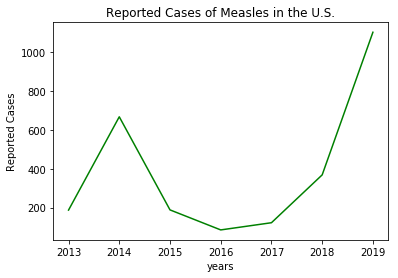

In [162]:
measles_plot, = plt.plot(years, y_axis, color="green")
plt.title("Reported Cases of Measles in the U.S.")
plt.xlabel("years")
plt.ylabel("Reported Cases")

In [163]:
x_axis = np.arange(len(years))
x_axis

array([0, 1, 2, 3, 4, 5, 6])

<function matplotlib.pyplot.show(*args, **kw)>

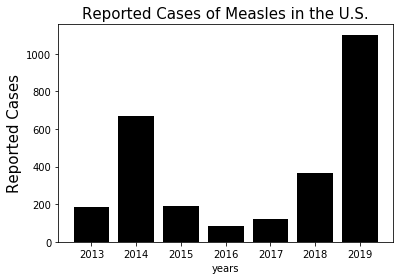

In [164]:
plt.bar(x_axis, y_axis, color='black', align="center")
plt.title("Reported Cases of Measles in the U.S.", size=15)
plt.xlabel("years")
plt.ylabel("Reported Cases", size=15)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, years)
plt.savefig("RecentTrend.png")
plt.show

In [165]:
plt.savefig("RecentTrend.png")

<Figure size 432x288 with 0 Axes>

In [166]:
NNDSS_HALF_CLEAN.head(10)

,Reporting Area,MMWR Week,MNDC,MNDMAX,MND2019,MND2018,MMPC,MMPMAX,MMP2019,MMP2018,2018,2019
1751,NEW ENGLAND,26,NaN,2.0,3.0,NaN,NaN,2.0,7.0,3.0,6.04,10.0
1752,CONNECTICUT,26,NaN,2.0,2.0,NaN,NaN,1.0,1.0,3.0,5.28,3.0
1753,MAINE,26,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.52,2.0
1754,MASSACHUSETTS,26,NaN,0.0,NaN,NaN,NaN,2.0,3.0,NaN,1.52,3.0
1755,NEW HAMPSHIRE,26,NaN,0.0,NaN,NaN,NaN,1.0,2.0,NaN,0.76,2.0
1756,RHODE ISLAND,26,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.00,0.0
1757,VERMONT,26,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,0.76,0.0
1759,NEW JERSEY,26,NaN,13.0,12.0,1.0,NaN,1.0,2.0,3.0,14.64,14.0
1760,NEW YORK,26,NaN,8.0,20.0,NaN,16.0,63.0,202.0,6.0,59.96,206.0
1761,NEW YORK CITY,26,NaN,52.0,485.0,NaN,NaN,11.0,59.0,3.0,50.88,544.0


In [167]:
NNDSS_HALF_CLEAN = NNDSS_HALF_CLEAN.sort_values("2019", ascending=False)
NNDSS_HALF_CLEAN = NNDSS_HALF_CLEAN.reset_index(drop=True)
NNDSS_HALF_CLEAN.head()

,Reporting Area,MMWR Week,MNDC,MNDMAX,MND2019,MND2018,MMPC,MMPMAX,MMP2019,MMP2018,2018,2019
0,NEW YORK CITY,26,NaN,52.0,485.0,NaN,NaN,11.0,59.0,3.0,50.88,544.0
1,NEW YORK,26,NaN,8.0,20.0,NaN,16.0,63.0,202.0,6.0,59.96,206.0
2,WASHINGTON,26,NaN,17.0,76.0,NaN,NaN,3.0,NaN,NaN,15.20,76.0
3,CALIFORNIA,26,NaN,9.0,28.0,9.0,NaN,3.0,27.0,8.0,26.12,55.0
4,EAST NORTH CENTRAL,26,NaN,4.0,4.0,1.0,NaN,18.0,49.0,5.0,22.72,53.0


In [168]:
xx=NNDSS_HALF_CLEAN['Reporting Area']
xx

0                NEW YORK CITY
1                     NEW YORK
2                   WASHINGTON
3                   CALIFORNIA
4           EAST NORTH CENTRAL
5                     MICHIGAN
6                        TEXAS
7                   NEW JERSEY
8                       OREGON
9                  NEW ENGLAND
10                PENNSYLVANIA
11                    ILLINOIS
12          EAST SOUTH CENTRAL
13                   TENNESSEE
14                    MOUNTAIN
15                     GEORGIA
16                    OKLAHOMA
17                    MARYLAND
18                 CONNECTICUT
19               MASSACHUSETTS
20                     FLORIDA
21          WEST NORTH CENTRAL
22                    MISSOURI
23                    KENTUCKY
24               NEW HAMPSHIRE
25                       MAINE
26                     ARIZONA
27                    COLORADO
28                  NEW MEXICO
29                    VIRGINIA
                ...           
34        DISTRICT OF COLUMBIA
35      

In [169]:
yy= NNDSS_HALF_CLEAN['2019']
yy

0     544.0
1     206.0
2      76.0
3      55.0
4      53.0
5      43.0
6      15.0
7      14.0
8      14.0
9      10.0
10      9.0
11      9.0
12      7.0
13      5.0
14      4.0
15      4.0
16      4.0
17      4.0
18      3.0
19      3.0
20      3.0
21      2.0
22      2.0
23      2.0
24      2.0
25      2.0
26      1.0
27      1.0
28      1.0
29      1.0
      ...  
34      0.0
35      0.0
36      0.0
37      0.0
38      0.0
39      0.0
40      0.0
41      0.0
42      0.0
43      0.0
44      0.0
45      0.0
46      0.0
47      0.0
48      0.0
49      0.0
50      0.0
51      0.0
52      0.0
53      0.0
54      0.0
55      0.0
56      0.0
57      0.0
58      0.0
59      0.0
60      0.0
61      0.0
62      0.0
63      0.0
Name: 2019, Length: 64, dtype: float64

In [170]:
#plt.bar(xx, yy, color=('green'), alpha=0.7, align="center")
#plt.title("Reported Cases of Measles in states/regions")
#plt.xlabel("states and regions")
#plt.ylabel("Number of cases")
#tick_locations = [v for v in xx]
#plt.xticks(tick_locations, xx)

In [171]:
#plt.savefig("StateDist2019.png")

In [172]:
explode = (0.2, 0, 0)
color = ['maroon','firebrick','red','orangered','tomato','darkorange','orange','gold','yellow',
          'yellowgreen','lawngreen','lime','limegreen','green','darkcyan','steelblue','dodgerblue',
          'royalblue','blue','navy','blueviolet','darkviolet','violet','purple']
color2 = ['black','maroon','firebrick','red','orangered','tomato','darkorange','orange','gold','yellow',
          'yellowgreen','lawngreen','lime','limegreen','green','darkcyan','steelblue','dodgerblue',
          'royalblue','blue','navy','blueviolet','darkviolet','violet','purple']
color3 = ['black', 'magenta', 'gold']

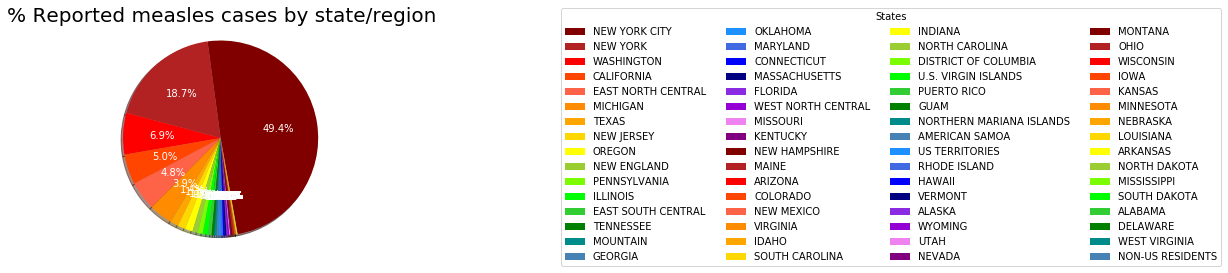

In [173]:
plt.pie(yy, explode=None, labels=xx, colors=color, textprops={'color':"white"},
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.title('% Reported measles cases by state/region', color ="black", size=20)
plt.axis('equal')
plt.legend(title='States', loc="right", ncol=4, bbox_to_anchor=(3, 0, 0.5, 1))
plt.savefig("%TopRegions2019.png", bbox_inches='tight')
plt.show()

In [174]:
NNDSS_NUMERIC_CLEAN = NNDSS_HALF_CLEAN.fillna(0)
NNDSS_NUMERIC_CLEAN.head()

,Reporting Area,MMWR Week,MNDC,MNDMAX,MND2019,MND2018,MMPC,MMPMAX,MMP2019,MMP2018,2018,2019
0,NEW YORK CITY,26,0.0,52.0,485.0,0.0,0.0,11.0,59.0,3.0,50.88,544.0
1,NEW YORK,26,0.0,8.0,20.0,0.0,16.0,63.0,202.0,6.0,59.96,206.0
2,WASHINGTON,26,0.0,17.0,76.0,0.0,0.0,3.0,0.0,0.0,15.20,76.0
3,CALIFORNIA,26,0.0,9.0,28.0,9.0,0.0,3.0,27.0,8.0,26.12,55.0
4,EAST NORTH CENTRAL,26,0.0,4.0,4.0,1.0,0.0,18.0,49.0,5.0,22.72,53.0


In [175]:
#NNDSS_HALF_CLEAN.fillna(0)

In [176]:
NUMERIC = NNDSS_NUMERIC_CLEAN.transpose()
NUMERIC

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
Reporting Area,NEW YORK CITY,NEW YORK,WASHINGTON,CALIFORNIA,EAST NORTH CENTRAL,MICHIGAN,TEXAS,NEW JERSEY,OREGON,NEW ENGLAND,...,NEBRASKA,LOUISIANA,ARKANSAS,NORTH DAKOTA,MISSISSIPPI,SOUTH DAKOTA,ALABAMA,DELAWARE,WEST VIRGINIA,NON-US RESIDENTS
MMWR Week,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
MNDC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MNDMAX,52,8,17,9,4,4,5,13,4,2,...,0,0,0,0,0,0,0,0,0,0
MND2019,485,20,76,28,4,0,10,12,11,3,...,0,0,0,0,0,0,0,0,0,0
MND2018,0,0,0,9,1,0,5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
MMPC,0,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MMPMAX,11,63,3,3,18,17,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
MMP2019,59,202,0,27,49,43,5,2,3,7,...,0,0,0,0,0,0,0,0,0,0
MMP2018,3,6,0,8,5,2,1,3,1,3,...,0,2,1,0,0,0,0,0,0,0


In [177]:
NUMERIC.columns = NUMERIC.iloc[0]
NUMERIC

Reporting Area,NEW YORK CITY,NEW YORK,WASHINGTON,CALIFORNIA,EAST NORTH CENTRAL,MICHIGAN,TEXAS,NEW JERSEY,OREGON,NEW ENGLAND,...,NEBRASKA,LOUISIANA,ARKANSAS,NORTH DAKOTA,MISSISSIPPI,SOUTH DAKOTA,ALABAMA,DELAWARE,WEST VIRGINIA,NON-US RESIDENTS
Reporting Area,NEW YORK CITY,NEW YORK,WASHINGTON,CALIFORNIA,EAST NORTH CENTRAL,MICHIGAN,TEXAS,NEW JERSEY,OREGON,NEW ENGLAND,...,NEBRASKA,LOUISIANA,ARKANSAS,NORTH DAKOTA,MISSISSIPPI,SOUTH DAKOTA,ALABAMA,DELAWARE,WEST VIRGINIA,NON-US RESIDENTS
MMWR Week,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
MNDC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MNDMAX,52,8,17,9,4,4,5,13,4,2,...,0,0,0,0,0,0,0,0,0,0
MND2019,485,20,76,28,4,0,10,12,11,3,...,0,0,0,0,0,0,0,0,0,0
MND2018,0,0,0,9,1,0,5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
MMPC,0,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MMPMAX,11,63,3,3,18,17,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
MMP2019,59,202,0,27,49,43,5,2,3,7,...,0,0,0,0,0,0,0,0,0,0
MMP2018,3,6,0,8,5,2,1,3,1,3,...,0,2,1,0,0,0,0,0,0,0


In [178]:
NUMERIC_CONDENSED = NUMERIC.iloc[10:12]
NUMERIC_CONDENSED

Reporting Area,NEW YORK CITY,NEW YORK,WASHINGTON,CALIFORNIA,EAST NORTH CENTRAL,MICHIGAN,TEXAS,NEW JERSEY,OREGON,NEW ENGLAND,...,NEBRASKA,LOUISIANA,ARKANSAS,NORTH DAKOTA,MISSISSIPPI,SOUTH DAKOTA,ALABAMA,DELAWARE,WEST VIRGINIA,NON-US RESIDENTS
2018,50.88,59.96,15.2,26.12,22.72,17.96,10.56,14.64,4.8,6.04,...,0,2,1,0,0,0,0,0,0,0
2019,544,206,76,55,53,43,15,14,14,10,...,0,0,0,0,0,0,0,0,0,0


In [179]:
#NUMERIC_X = NUMERIC_CONDENSED.index.tolist()
#NUMERIC_X

In [180]:
#NUMERIC_Y = NUMERIC_CONDENSED.keys()
#NUMERIC_Y

/Users/jam/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


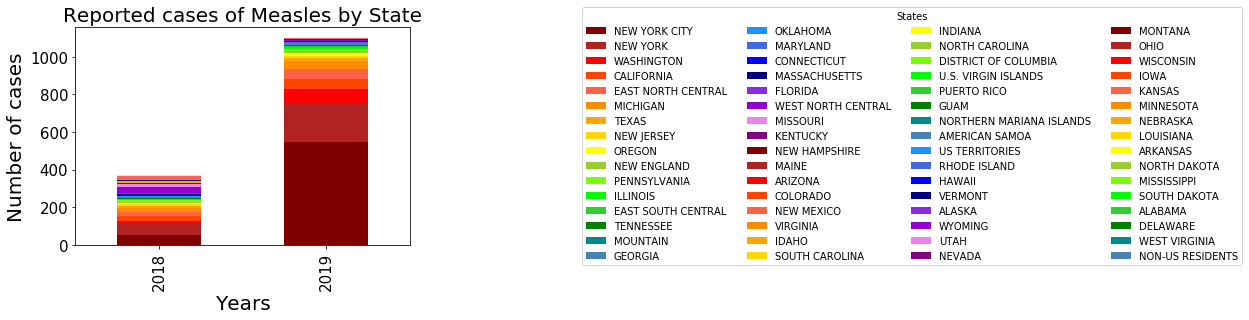

In [181]:
NUMERIC_CONDENSED.plot.bar(stacked=True, colors = color)
plt.legend(title='States', loc="right", ncol=4, bbox_to_anchor=(3, 0, 0.5, 1))
plt.title('Reported cases of Measles by State', color ="black", size=20)
plt.xlabel("Years", size=20)
plt.ylabel("Number of cases", size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.savefig("ActualTopRegions2019.png", bbox_inches='tight')
plt.show()

In [182]:
cdc_shorter_three.head()

,2013,2014,2015,2016,2017,Disease
0,187.0,667.0,188.0,85.0,122.0,Measles


In [183]:
cdc_shorter_three.describe()

,2013,2014,2015,2016,2017
count,1.0,1.0,1.0,1.0,1.0
mean,187.0,667.0,188.0,85.0,122.0
std,NaN,NaN,NaN,NaN,NaN
min,187.0,667.0,188.0,85.0,122.0
25%,187.0,667.0,188.0,85.0,122.0
50%,187.0,667.0,188.0,85.0,122.0
75%,187.0,667.0,188.0,85.0,122.0
max,187.0,667.0,188.0,85.0,122.0


In [184]:
WIP = NUMERIC_CONDENSED.transpose()
WIP.head()

,2018,2019
Reporting Area,,
NEW YORK CITY,50.88,544
NEW YORK,59.96,206
WASHINGTON,15.2,76
CALIFORNIA,26.12,55
EAST NORTH CENTRAL,22.72,53


In [185]:
WIP.index.names = ['Disease']
WIP.head()

,2018,2019
Disease,,
NEW YORK CITY,50.88,544
NEW YORK,59.96,206
WASHINGTON,15.2,76
CALIFORNIA,26.12,55
EAST NORTH CENTRAL,22.72,53


In [186]:
WIP.describe()

,2018,2019
count,64.0,64.0
unique,28.0,17.0
top,0.0,0.0
freq,23.0,31.0


In [187]:
#merging 
collective = pd.merge(cdc_shorter_three, WIP, how="outer", on="Disease")
collective.head()

,2013,2014,2015,2016,2017,Disease,2018,2019
0,187.0,667.0,188.0,85.0,122.0,Measles,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NEW YORK CITY,50.88,544
2,NaN,NaN,NaN,NaN,NaN,NEW YORK,59.96,206
3,NaN,NaN,NaN,NaN,NaN,WASHINGTON,15.2,76
4,NaN,NaN,NaN,NaN,NaN,CALIFORNIA,26.12,55


In [188]:
collective = collective.drop(combined_measles.columns[5], axis=1)
collective.head()

,2013,2014,2015,2016,2017,2018,2019
0,187.0,667.0,188.0,85.0,122.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,50.88,544
2,NaN,NaN,NaN,NaN,NaN,59.96,206
3,NaN,NaN,NaN,NaN,NaN,15.2,76
4,NaN,NaN,NaN,NaN,NaN,26.12,55


In [189]:
collective = collective.fillna(0)
collective.head()

,2013,2014,2015,2016,2017,2018,2019
0,187.0,667.0,188.0,85.0,122.0,0.00,0.0
1,0.0,0.0,0.0,0.0,0.0,50.88,544.0
2,0.0,0.0,0.0,0.0,0.0,59.96,206.0
3,0.0,0.0,0.0,0.0,0.0,15.20,76.0
4,0.0,0.0,0.0,0.0,0.0,26.12,55.0


In [190]:
completed = collective.transpose()
completed

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
2013,187.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014,667.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,188.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016,85.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,122.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,0.0,50.88,59.96,15.2,26.12,22.72,17.96,10.56,14.64,4.8,...,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019,0.0,544.00,206.00,76.0,55.00,53.00,43.00,15.00,14.00,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


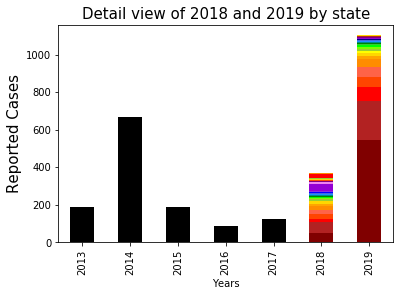

In [191]:
completed.plot.bar(stacked=True, colors = color2, legend=False)
#plt.legend(title='States', loc="right", ncol=4, bbox_to_anchor=(3, 0, 0.5, 1))
plt.title('Detail view of 2018 and 2019 by state', color ="black", size=15)
plt.xlabel("Years")
plt.ylabel("Reported Cases", size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.savefig("ActualTopRegions.png", bbox_inches='tight')
plt.show()

In [192]:
NNDSS_NUMERIC_CLEAN.head()

,Reporting Area,MMWR Week,MNDC,MNDMAX,MND2019,MND2018,MMPC,MMPMAX,MMP2019,MMP2018,2018,2019
0,NEW YORK CITY,26,0.0,52.0,485.0,0.0,0.0,11.0,59.0,3.0,50.88,544.0
1,NEW YORK,26,0.0,8.0,20.0,0.0,16.0,63.0,202.0,6.0,59.96,206.0
2,WASHINGTON,26,0.0,17.0,76.0,0.0,0.0,3.0,0.0,0.0,15.20,76.0
3,CALIFORNIA,26,0.0,9.0,28.0,9.0,0.0,3.0,27.0,8.0,26.12,55.0
4,EAST NORTH CENTRAL,26,0.0,4.0,4.0,1.0,0.0,18.0,49.0,5.0,22.72,53.0


In [193]:
#measles_type_sum = measles_type.sum()
#measles_type_sum

In [194]:
NNDSS_NUMERIC_CLEAN.head()

,Reporting Area,MMWR Week,MNDC,MNDMAX,MND2019,MND2018,MMPC,MMPMAX,MMP2019,MMP2018,2018,2019
0,NEW YORK CITY,26,0.0,52.0,485.0,0.0,0.0,11.0,59.0,3.0,50.88,544.0
1,NEW YORK,26,0.0,8.0,20.0,0.0,16.0,63.0,202.0,6.0,59.96,206.0
2,WASHINGTON,26,0.0,17.0,76.0,0.0,0.0,3.0,0.0,0.0,15.20,76.0
3,CALIFORNIA,26,0.0,9.0,28.0,9.0,0.0,3.0,27.0,8.0,26.12,55.0
4,EAST NORTH CENTRAL,26,0.0,4.0,4.0,1.0,0.0,18.0,49.0,5.0,22.72,53.0


In [195]:
NNDSS_NUMERIC_CLEAN['IND2018'] = NNDSS_NUMERIC_CLEAN['MND2018'] + NNDSS_NUMERIC_CLEAN['MNDMAX']*0.76
NNDSS_NUMERIC_CLEAN['IMP2018'] = NNDSS_NUMERIC_CLEAN['MMP2018'] + NNDSS_NUMERIC_CLEAN['MMPMAX']*0.76
NNDSS_NUMERIC_CLEAN['IND2019'] = NNDSS_NUMERIC_CLEAN['MND2019'] - NNDSS_NUMERIC_CLEAN['MNDC']
NNDSS_NUMERIC_CLEAN['IMP2019'] = NNDSS_NUMERIC_CLEAN['MMP2019'] - NNDSS_NUMERIC_CLEAN['MMPC']
NNDSS_NUMERIC_CLEAN.head()

,Reporting Area,MMWR Week,MNDC,MNDMAX,MND2019,MND2018,MMPC,MMPMAX,MMP2019,MMP2018,2018,2019,IND2018,IMP2018,IND2019,IMP2019
0,NEW YORK CITY,26,0.0,52.0,485.0,0.0,0.0,11.0,59.0,3.0,50.88,544.0,39.52,11.36,485.0,59.0
1,NEW YORK,26,0.0,8.0,20.0,0.0,16.0,63.0,202.0,6.0,59.96,206.0,6.08,53.88,20.0,186.0
2,WASHINGTON,26,0.0,17.0,76.0,0.0,0.0,3.0,0.0,0.0,15.20,76.0,12.92,2.28,76.0,0.0
3,CALIFORNIA,26,0.0,9.0,28.0,9.0,0.0,3.0,27.0,8.0,26.12,55.0,15.84,10.28,28.0,27.0
4,EAST NORTH CENTRAL,26,0.0,4.0,4.0,1.0,0.0,18.0,49.0,5.0,22.72,53.0,4.04,18.68,4.0,49.0


In [196]:
measles_type = NNDSS_NUMERIC_CLEAN.drop(NNDSS_NUMERIC_CLEAN.columns[1:12], axis=1)
measles_type.head()

,Reporting Area,IND2018,IMP2018,IND2019,IMP2019
0,NEW YORK CITY,39.52,11.36,485.0,59.0
1,NEW YORK,6.08,53.88,20.0,186.0
2,WASHINGTON,12.92,2.28,76.0,0.0
3,CALIFORNIA,15.84,10.28,28.0,27.0
4,EAST NORTH CENTRAL,4.04,18.68,4.0,49.0


In [197]:
measles_type.loc['Total']= measles_type.sum()
measles_type.tail()

,Reporting Area,IND2018,IMP2018,IND2019,IMP2019
60,ALABAMA,0.0,0.0,0.0,0.0
61,DELAWARE,0.0,0.0,0.0,0.0
62,WEST VIRGINIA,0.0,0.0,0.0,0.0
63,NON-US RESIDENTS,0.0,0.0,0.0,0.0
Total,NEW YORK CITYNEW YORKWASHINGTONCALIFORNIAEAST ...,169.2,199.0,681.0,421.0


In [198]:
type_total = measles_type.drop(measles_type.index[0:64])
type_total

,Reporting Area,IND2018,IMP2018,IND2019,IMP2019
Total,NEW YORK CITYNEW YORKWASHINGTONCALIFORNIAEAST ...,169.2,199.0,681.0,421.0


In [199]:
type_total_short = type_total.drop(['Reporting Area'], axis=1)
type_total_short

,IND2018,IMP2018,IND2019,IMP2019
Total,169.2,199.0,681.0,421.0


In [200]:
type_list = type_total_short.values.tolist()
type_list

[[169.19999999999996, 198.99999999999986, 681.0, 421.0]]

In [201]:
type_df = pd.DataFrame(np.array(type_list).reshape(2,2), columns = ('Indigenous','Imported'))
type_df

,Indigenous,Imported
0,169.2,199.0
1,681.0,421.0


In [202]:
type_df.describe()

,Indigenous,Imported
count,2.000000,2.000000
mean,425.100000,310.000000
std,361.897251,156.977705
min,169.200000,199.000000
25%,297.150000,254.500000
50%,425.100000,310.000000
75%,553.050000,365.500000
max,681.000000,421.000000


In [203]:
type_df.index.names = ['Disease']
type_df

,Indigenous,Imported
Disease,,
0,169.2,199.0
1,681.0,421.0


In [204]:
type_final = type_df.rename(index={0: '2018', 1: '2019'})
type_final

,Indigenous,Imported
Disease,,
2018,169.2,199.0
2019,681.0,421.0


In [205]:
type_two = type_final.transpose()
type_two

Disease,2018,2019
Indigenous,169.2,681.0
Imported,199.0,421.0


In [206]:
type_two.describe()

Disease,2018,2019
count,2.000000,2.000000
mean,184.100000,551.000000
std,21.071782,183.847763
min,169.200000,421.000000
25%,176.650000,486.000000
50%,184.100000,551.000000
75%,191.550000,616.000000
max,199.000000,681.000000


In [207]:
cdc_shorter_three.describe()

,2013,2014,2015,2016,2017
count,1.0,1.0,1.0,1.0,1.0
mean,187.0,667.0,188.0,85.0,122.0
std,NaN,NaN,NaN,NaN,NaN
min,187.0,667.0,188.0,85.0,122.0
25%,187.0,667.0,188.0,85.0,122.0
50%,187.0,667.0,188.0,85.0,122.0
75%,187.0,667.0,188.0,85.0,122.0
max,187.0,667.0,188.0,85.0,122.0


In [208]:
cdc_shorter_three

,2013,2014,2015,2016,2017,Disease
0,187.0,667.0,188.0,85.0,122.0,Measles


In [209]:
type_two.values.astype(int)

array([[169, 681],
       [198, 421]])

In [210]:
d = {'Disease': ['Indegenous','Imported'], '2018': [169.2, 199], '2019': [681, 421]}
d

{'Disease': ['Indegenous', 'Imported'],
 '2018': [169.2, 199],
 '2019': [681, 421]}

In [211]:
dd = pd.DataFrame(d)
dd

,Disease,2018,2019
0,Indegenous,169.2,681
1,Imported,199.0,421


In [212]:
consolidate = pd.merge(cdc_shorter_three, dd, how="outer", on="Disease")
consolidate.head()

,2013,2014,2015,2016,2017,Disease,2018,2019
0,187.0,667.0,188.0,85.0,122.0,Measles,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,Indegenous,169.2,681.0
2,NaN,NaN,NaN,NaN,NaN,Imported,199.0,421.0


In [213]:
consolidate = consolidate.drop(consolidate.columns[5], axis=1)
consolidate.head()

,2013,2014,2015,2016,2017,2018,2019
0,187.0,667.0,188.0,85.0,122.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,169.2,681.0
2,NaN,NaN,NaN,NaN,NaN,199.0,421.0


In [214]:
consolidate = consolidate.fillna(0)
consolidate.head()

,2013,2014,2015,2016,2017,2018,2019
0,187.0,667.0,188.0,85.0,122.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,169.2,681.0
2,0.0,0.0,0.0,0.0,0.0,199.0,421.0


In [215]:
final = consolidate.transpose()
final

,0,1,2
2013,187.0,0.0,0.0
2014,667.0,0.0,0.0
2015,188.0,0.0,0.0
2016,85.0,0.0,0.0
2017,122.0,0.0,0.0
2018,0.0,169.2,199.0
2019,0.0,681.0,421.0


In [216]:
finale = final.rename(index=str, columns={0 : "Total", 
                                          1 : "Indigenous",
                                          2 :  "Imported"
                                          }
)
finale

,Total,Indigenous,Imported
2013,187.0,0.0,0.0
2014,667.0,0.0,0.0
2015,188.0,0.0,0.0
2016,85.0,0.0,0.0
2017,122.0,0.0,0.0
2018,0.0,169.2,199.0
2019,0.0,681.0,421.0


In [217]:
finale.values.astype(int)

array([[187,   0,   0],
       [667,   0,   0],
       [188,   0,   0],
       [ 85,   0,   0],
       [122,   0,   0],
       [  0, 169, 199],
       [  0, 681, 421]])

In [218]:
finale

,Total,Indigenous,Imported
2013,187.0,0.0,0.0
2014,667.0,0.0,0.0
2015,188.0,0.0,0.0
2016,85.0,0.0,0.0
2017,122.0,0.0,0.0
2018,0.0,169.2,199.0
2019,0.0,681.0,421.0


In [219]:
color3

['black', 'magenta', 'gold']

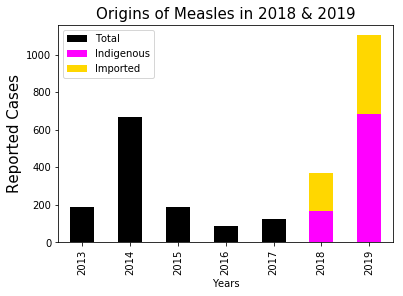

In [220]:
finale.plot.bar(stacked=True, colors = color3, legend=True)
plt.title('Origins of Measles in 2018 & 2019', color ="black", size=15)
plt.xlabel("Years")
plt.ylabel("Reported Cases", size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.savefig("breakdown.png", bbox_inches='tight')
plt.show()